# Deep Q-Learning 

Install dependencies for AI gym to run properly (shouldn't take more than a minute). If running on google cloud or running locally, only need to run once. Colab may require installing everytime the vm shuts down.

In [1]:
!pip3 install gym pyvirtualdisplay
!sudo apt-get install -y xvfb python-opengl ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.1.6-1~deb10u1).
python-opengl is already the newest version (3.1.0+dfsg-2).
xvfb is already the newest version (2:1.20.4-1+deb10u2).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


In [2]:
!pip3 install --upgrade setuptools --user
!pip3 install ez_setup 
!pip3 install gym[atari] 

For this assignment we will implement the Deep Q-Learning algorithm with Experience Replay as described in breakthrough paper __"Playing Atari with Deep Reinforcement Learning"__. We will train an agent to play the famous game of __Breakout__.

In [3]:
%matplotlib inline

import sys
import gym
import torch
import pylab
import random
import numpy as np
from collections import deque
from datetime import datetime
from copy import deepcopy
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from utils import find_max_lives, check_live, get_frame, get_init_state
from model import DQN
from config import *

import matplotlib.pyplot as plt
# %load_ext autoreload
# %autoreload 2

## Understanding the environment

In the following cell, we initialize our game of __Breakout__ and you can see how the environment looks like. For further documentation of the of the environment refer to https://gym.openai.com/envs. 

In breakout, we will use 3 actions "fire", "left", and "right". "fire" is only used to reset the game when a life is lost, "left" moves the agent left and "right" moves the agent right.

In [4]:
env = gym.make('BreakoutDeterministic-v4')
state = env.reset()

In [5]:
number_lives = find_max_lives(env)
state_size = env.observation_space.shape
action_size = 3 #fire, left, and right

## Creating a DQN Agent

Here we create a DQN Agent. This agent is defined in the __agent.py__. The corresponding neural network is defined in the __model.py__. Once you've created a working DQN agent, use the code in agent.py to create a double DQN agent in __agent_double.py__. Set the flag "double_dqn" to True to train the double DQN agent.

__Evaluation Reward__ : The average reward received in the past 100 episodes/games.

__Frame__ : Number of frames processed in total.

__Memory Size__ : The current size of the replay memory.

In [6]:
double_dqn = True # set to True if using double DQN agent

if double_dqn:
    from agent_double import Agent
else:
    from agent import Agent

agent = Agent(action_size)
evaluation_reward = deque(maxlen=evaluation_reward_length)
frame = 0
memory_size = 0

### Main Training Loop

In this training loop, we do not render the screen because it slows down training signficantly. To watch the agent play the game, run the code in next section "Visualize Agent Performance"

episode: 0   score: 3.0   memory length: 227   epsilon: 1.0    steps: 227    lr: 0.0001     evaluation reward: 3.0
episode: 1   score: 2.0   memory length: 448   epsilon: 1.0    steps: 221    lr: 0.0001     evaluation reward: 2.5
episode: 2   score: 0.0   memory length: 570   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.6666666666666667
episode: 3   score: 2.0   memory length: 768   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.75
episode: 4   score: 1.0   memory length: 918   epsilon: 1.0    steps: 150    lr: 0.0001     evaluation reward: 1.6
episode: 5   score: 0.0   memory length: 1041   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.3333333333333333
episode: 6   score: 0.0   memory length: 1164   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.1428571428571428
episode: 7   score: 1.0   memory length: 1334   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.125
episode: 8   score: 2.0   mem

episode: 64   score: 0.0   memory length: 12086   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.5846153846153845
episode: 65   score: 0.0   memory length: 12208   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.5606060606060606
episode: 66   score: 4.0   memory length: 12483   epsilon: 1.0    steps: 275    lr: 0.0001     evaluation reward: 1.5970149253731343
episode: 67   score: 0.0   memory length: 12605   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.5735294117647058
episode: 68   score: 0.0   memory length: 12727   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.5507246376811594
episode: 69   score: 1.0   memory length: 12878   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.542857142857143
episode: 70   score: 5.0   memory length: 13182   epsilon: 1.0    steps: 304    lr: 0.0001     evaluation reward: 1.591549295774648
episode: 71   score: 0.0   memory length: 13304   epsilon: 1.0    steps

episode: 129   score: 2.0   memory length: 24512   epsilon: 1.0    steps: 197    lr: 0.0001     evaluation reward: 1.67
episode: 130   score: 1.0   memory length: 24682   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.62
episode: 131   score: 0.0   memory length: 24805   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.6
episode: 132   score: 1.0   memory length: 24956   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.6
episode: 133   score: 0.0   memory length: 25078   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.59
episode: 134   score: 1.0   memory length: 25247   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.58
episode: 135   score: 0.0   memory length: 25370   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.56
episode: 136   score: 0.0   memory length: 25493   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.56
episode: 137   score: 2.0   memory length:

episode: 198   score: 2.0   memory length: 36530   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.42
episode: 199   score: 2.0   memory length: 36749   epsilon: 1.0    steps: 219    lr: 0.0001     evaluation reward: 1.43
episode: 200   score: 0.0   memory length: 36871   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.41
episode: 201   score: 0.0   memory length: 36994   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.39
episode: 202   score: 2.0   memory length: 37213   epsilon: 1.0    steps: 219    lr: 0.0001     evaluation reward: 1.41
episode: 203   score: 2.0   memory length: 37411   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.42
episode: 204   score: 0.0   memory length: 37534   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.42
episode: 205   score: 1.0   memory length: 37704   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.37
episode: 206   score: 0.0   memory lengt

episode: 267   score: 0.0   memory length: 49645   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.47
episode: 268   score: 5.0   memory length: 49988   epsilon: 1.0    steps: 343    lr: 0.0001     evaluation reward: 1.51
episode: 269   score: 0.0   memory length: 50111   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.51
episode: 270   score: 1.0   memory length: 50261   epsilon: 1.0    steps: 150    lr: 0.0001     evaluation reward: 1.5
episode: 271   score: 2.0   memory length: 50479   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.52
episode: 272   score: 1.0   memory length: 50649   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.53
episode: 273   score: 0.0   memory length: 50771   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.52
episode: 274   score: 1.0   memory length: 50942   epsilon: 1.0    steps: 171    lr: 0.0001     evaluation reward: 1.53
episode: 275   score: 2.0   memory length

episode: 336   score: 0.0   memory length: 61750   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.41
episode: 337   score: 1.0   memory length: 61922   epsilon: 1.0    steps: 172    lr: 0.0001     evaluation reward: 1.42
episode: 338   score: 2.0   memory length: 62104   epsilon: 1.0    steps: 182    lr: 0.0001     evaluation reward: 1.4
episode: 339   score: 1.0   memory length: 62254   epsilon: 1.0    steps: 150    lr: 0.0001     evaluation reward: 1.41
episode: 340   score: 3.0   memory length: 62521   epsilon: 1.0    steps: 267    lr: 0.0001     evaluation reward: 1.44
episode: 341   score: 2.0   memory length: 62718   epsilon: 1.0    steps: 197    lr: 0.0001     evaluation reward: 1.46
episode: 342   score: 1.0   memory length: 62887   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.47
episode: 343   score: 2.0   memory length: 63105   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.49
episode: 344   score: 2.0   memory length

episode: 405   score: 3.0   memory length: 74623   epsilon: 1.0    steps: 244    lr: 0.0001     evaluation reward: 1.52
episode: 406   score: 0.0   memory length: 74746   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.52
episode: 407   score: 2.0   memory length: 74929   epsilon: 1.0    steps: 183    lr: 0.0001     evaluation reward: 1.51
episode: 408   score: 0.0   memory length: 75052   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.51
episode: 409   score: 4.0   memory length: 75350   epsilon: 1.0    steps: 298    lr: 0.0001     evaluation reward: 1.53
episode: 410   score: 0.0   memory length: 75473   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.53
episode: 411   score: 1.0   memory length: 75624   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.51
episode: 412   score: 1.0   memory length: 75794   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.52
episode: 413   score: 0.0   memory lengt

episode: 474   score: 2.0   memory length: 87486   epsilon: 1.0    steps: 217    lr: 0.0001     evaluation reward: 1.63
episode: 475   score: 3.0   memory length: 87752   epsilon: 1.0    steps: 266    lr: 0.0001     evaluation reward: 1.63
episode: 476   score: 2.0   memory length: 87951   epsilon: 1.0    steps: 199    lr: 0.0001     evaluation reward: 1.61
episode: 477   score: 2.0   memory length: 88148   epsilon: 1.0    steps: 197    lr: 0.0001     evaluation reward: 1.62
episode: 478   score: 0.0   memory length: 88270   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.6
episode: 479   score: 0.0   memory length: 88392   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.59
episode: 480   score: 2.0   memory length: 88609   epsilon: 1.0    steps: 217    lr: 0.0001     evaluation reward: 1.6
episode: 481   score: 2.0   memory length: 88807   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.62
episode: 482   score: 2.0   memory length:

/home/good4hwan/assignment5/memory.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  sample = np.array(sample)
/home/good4hwan/assignment5/agent_double.py:75: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  mini_batch = np.array(mini_batch).transpose()


episode: 543   score: 3.0   memory length: 100133   epsilon: 0.9997346800000058    steps: 267    lr: 0.0001     evaluation reward: 1.62
episode: 544   score: 0.0   memory length: 100255   epsilon: 0.999493120000011    steps: 122    lr: 0.0001     evaluation reward: 1.6
episode: 545   score: 1.0   memory length: 100406   epsilon: 0.9991941400000175    steps: 151    lr: 0.0001     evaluation reward: 1.59
episode: 546   score: 2.0   memory length: 100625   epsilon: 0.9987605200000269    steps: 219    lr: 0.0001     evaluation reward: 1.59
episode: 547   score: 0.0   memory length: 100748   epsilon: 0.9985169800000322    steps: 123    lr: 0.0001     evaluation reward: 1.55
episode: 548   score: 3.0   memory length: 101014   epsilon: 0.9979903000000436    steps: 266    lr: 0.0001     evaluation reward: 1.57
episode: 549   score: 5.0   memory length: 101380   epsilon: 0.9972656200000594    steps: 366    lr: 0.0001     evaluation reward: 1.59
episode: 550   score: 2.0   memory length: 101560 

episode: 604   score: 0.0   memory length: 111225   epsilon: 0.9777725200004825    steps: 123    lr: 0.0001     evaluation reward: 1.51
episode: 605   score: 0.0   memory length: 111347   epsilon: 0.9775309600004878    steps: 122    lr: 0.0001     evaluation reward: 1.49
episode: 606   score: 3.0   memory length: 111613   epsilon: 0.9770042800004992    steps: 266    lr: 0.0001     evaluation reward: 1.51
episode: 607   score: 2.0   memory length: 111828   epsilon: 0.9765785800005085    steps: 215    lr: 0.0001     evaluation reward: 1.53
episode: 608   score: 0.0   memory length: 111951   epsilon: 0.9763350400005137    steps: 123    lr: 0.0001     evaluation reward: 1.51
episode: 609   score: 3.0   memory length: 112218   epsilon: 0.9758063800005252    steps: 267    lr: 0.0001     evaluation reward: 1.52
episode: 610   score: 2.0   memory length: 112436   epsilon: 0.9753747400005346    steps: 218    lr: 0.0001     evaluation reward: 1.52
episode: 611   score: 0.0   memory length: 11255

episode: 665   score: 1.0   memory length: 122162   epsilon: 0.9561172600009527    steps: 168    lr: 0.0001     evaluation reward: 1.45
episode: 666   score: 2.0   memory length: 122360   epsilon: 0.9557252200009612    steps: 198    lr: 0.0001     evaluation reward: 1.43
episode: 667   score: 0.0   memory length: 122483   epsilon: 0.9554816800009664    steps: 123    lr: 0.0001     evaluation reward: 1.41
episode: 668   score: 4.0   memory length: 122744   epsilon: 0.9549649000009777    steps: 261    lr: 0.0001     evaluation reward: 1.44
episode: 669   score: 2.0   memory length: 122942   epsilon: 0.9545728600009862    steps: 198    lr: 0.0001     evaluation reward: 1.44
episode: 670   score: 0.0   memory length: 123065   epsilon: 0.9543293200009915    steps: 123    lr: 0.0001     evaluation reward: 1.43
episode: 671   score: 1.0   memory length: 123216   epsilon: 0.954030340000998    steps: 151    lr: 0.0001     evaluation reward: 1.42
episode: 672   score: 2.0   memory length: 123434

episode: 726   score: 0.0   memory length: 132915   epsilon: 0.9348263200014149    steps: 123    lr: 0.0001     evaluation reward: 1.33
episode: 727   score: 2.0   memory length: 133132   epsilon: 0.9343966600014242    steps: 217    lr: 0.0001     evaluation reward: 1.33
episode: 728   score: 3.0   memory length: 133361   epsilon: 0.933943240001434    steps: 229    lr: 0.0001     evaluation reward: 1.36
episode: 729   score: 3.0   memory length: 133607   epsilon: 0.9334561600014446    steps: 246    lr: 0.0001     evaluation reward: 1.34
episode: 730   score: 3.0   memory length: 133837   epsilon: 0.9330007600014545    steps: 230    lr: 0.0001     evaluation reward: 1.37
episode: 731   score: 3.0   memory length: 134063   epsilon: 0.9325532800014642    steps: 226    lr: 0.0001     evaluation reward: 1.38
episode: 732   score: 2.0   memory length: 134260   epsilon: 0.9321632200014727    steps: 197    lr: 0.0001     evaluation reward: 1.39
episode: 733   score: 3.0   memory length: 134522

episode: 787   score: 0.0   memory length: 144047   epsilon: 0.9127849600018934    steps: 123    lr: 0.0001     evaluation reward: 1.42
episode: 788   score: 1.0   memory length: 144217   epsilon: 0.9124483600019007    steps: 170    lr: 0.0001     evaluation reward: 1.42
episode: 789   score: 2.0   memory length: 144415   epsilon: 0.9120563200019092    steps: 198    lr: 0.0001     evaluation reward: 1.43
episode: 790   score: 0.0   memory length: 144537   epsilon: 0.9118147600019144    steps: 122    lr: 0.0001     evaluation reward: 1.42
episode: 791   score: 0.0   memory length: 144660   epsilon: 0.9115712200019197    steps: 123    lr: 0.0001     evaluation reward: 1.42
episode: 792   score: 1.0   memory length: 144829   epsilon: 0.911236600001927    steps: 169    lr: 0.0001     evaluation reward: 1.42
episode: 793   score: 2.0   memory length: 145026   epsilon: 0.9108465400019354    steps: 197    lr: 0.0001     evaluation reward: 1.42
episode: 794   score: 2.0   memory length: 145243

episode: 848   score: 2.0   memory length: 156470   epsilon: 0.8881874200024273    steps: 198    lr: 0.0001     evaluation reward: 1.72
episode: 849   score: 2.0   memory length: 156667   epsilon: 0.8877973600024358    steps: 197    lr: 0.0001     evaluation reward: 1.72
episode: 850   score: 1.0   memory length: 156838   epsilon: 0.8874587800024432    steps: 171    lr: 0.0001     evaluation reward: 1.71
episode: 851   score: 1.0   memory length: 157010   epsilon: 0.8871182200024506    steps: 172    lr: 0.0001     evaluation reward: 1.7
episode: 852   score: 2.0   memory length: 157208   epsilon: 0.8867261800024591    steps: 198    lr: 0.0001     evaluation reward: 1.72
episode: 853   score: 2.0   memory length: 157406   epsilon: 0.8863341400024676    steps: 198    lr: 0.0001     evaluation reward: 1.74
episode: 854   score: 1.0   memory length: 157557   epsilon: 0.8860351600024741    steps: 151    lr: 0.0001     evaluation reward: 1.72
episode: 855   score: 0.0   memory length: 157680

episode: 909   score: 1.0   memory length: 168956   epsilon: 0.863465140002964    steps: 169    lr: 0.0001     evaluation reward: 2.09
episode: 910   score: 3.0   memory length: 169208   epsilon: 0.8629661800029749    steps: 252    lr: 0.0001     evaluation reward: 2.12
episode: 911   score: 4.0   memory length: 169465   epsilon: 0.8624573200029859    steps: 257    lr: 0.0001     evaluation reward: 2.14
episode: 912   score: 3.0   memory length: 169731   epsilon: 0.8619306400029974    steps: 266    lr: 0.0001     evaluation reward: 2.13
episode: 913   score: 5.0   memory length: 170056   epsilon: 0.8612871400030113    steps: 325    lr: 0.0001     evaluation reward: 2.15
episode: 914   score: 3.0   memory length: 170284   epsilon: 0.8608357000030211    steps: 228    lr: 0.0001     evaluation reward: 2.15
episode: 915   score: 2.0   memory length: 170502   epsilon: 0.8604040600030305    steps: 218    lr: 0.0001     evaluation reward: 2.13
episode: 916   score: 1.0   memory length: 170653

episode: 970   score: 2.0   memory length: 182413   epsilon: 0.8368202800035425    steps: 198    lr: 0.0001     evaluation reward: 2.4
episode: 971   score: 2.0   memory length: 182630   epsilon: 0.8363906200035518    steps: 217    lr: 0.0001     evaluation reward: 2.38
episode: 972   score: 1.0   memory length: 182801   epsilon: 0.8360520400035591    steps: 171    lr: 0.0001     evaluation reward: 2.37
episode: 973   score: 3.0   memory length: 183069   epsilon: 0.8355214000035707    steps: 268    lr: 0.0001     evaluation reward: 2.38
episode: 974   score: 1.0   memory length: 183220   epsilon: 0.8352224200035772    steps: 151    lr: 0.0001     evaluation reward: 2.38
episode: 975   score: 0.0   memory length: 183343   epsilon: 0.8349788800035824    steps: 123    lr: 0.0001     evaluation reward: 2.36
episode: 976   score: 2.0   memory length: 183541   epsilon: 0.834586840003591    steps: 198    lr: 0.0001     evaluation reward: 2.37
episode: 977   score: 6.0   memory length: 183895 

episode: 1031   score: 4.0   memory length: 195483   epsilon: 0.8109416800041043    steps: 277    lr: 0.0001     evaluation reward: 2.31
episode: 1032   score: 5.0   memory length: 195828   epsilon: 0.8102585800041191    steps: 345    lr: 0.0001     evaluation reward: 2.35
episode: 1033   score: 2.0   memory length: 196026   epsilon: 0.8098665400041276    steps: 198    lr: 0.0001     evaluation reward: 2.35
episode: 1034   score: 4.0   memory length: 196322   epsilon: 0.8092804600041403    steps: 296    lr: 0.0001     evaluation reward: 2.36
episode: 1035   score: 3.0   memory length: 196571   epsilon: 0.808787440004151    steps: 249    lr: 0.0001     evaluation reward: 2.36
episode: 1036   score: 4.0   memory length: 196866   epsilon: 0.8082033400041637    steps: 295    lr: 0.0001     evaluation reward: 2.37
episode: 1037   score: 3.0   memory length: 197076   epsilon: 0.8077875400041727    steps: 210    lr: 0.0001     evaluation reward: 2.37
episode: 1038   score: 3.0   memory length

episode: 1091   score: 3.0   memory length: 209744   epsilon: 0.7827049000047173    steps: 233    lr: 0.0001     evaluation reward: 2.65
episode: 1092   score: 3.0   memory length: 209970   epsilon: 0.782257420004727    steps: 226    lr: 0.0001     evaluation reward: 2.64
episode: 1093   score: 2.0   memory length: 210169   epsilon: 0.7818634000047355    steps: 199    lr: 0.0001     evaluation reward: 2.63
episode: 1094   score: 1.0   memory length: 210338   epsilon: 0.7815287800047428    steps: 169    lr: 0.0001     evaluation reward: 2.63
episode: 1095   score: 3.0   memory length: 210573   epsilon: 0.7810634800047529    steps: 235    lr: 0.0001     evaluation reward: 2.64
episode: 1096   score: 7.0   memory length: 210960   epsilon: 0.7802972200047695    steps: 387    lr: 0.0001     evaluation reward: 2.69
episode: 1097   score: 2.0   memory length: 211176   epsilon: 0.7798695400047788    steps: 216    lr: 0.0001     evaluation reward: 2.7
episode: 1098   score: 1.0   memory length:

episode: 1151   score: 2.0   memory length: 225203   epsilon: 0.7520960800053818    steps: 198    lr: 0.0001     evaluation reward: 3.24
episode: 1152   score: 2.0   memory length: 225400   epsilon: 0.7517060200053902    steps: 197    lr: 0.0001     evaluation reward: 3.23
episode: 1153   score: 0.0   memory length: 225523   epsilon: 0.7514624800053955    steps: 123    lr: 0.0001     evaluation reward: 3.23
episode: 1154   score: 5.0   memory length: 225846   epsilon: 0.7508229400054094    steps: 323    lr: 0.0001     evaluation reward: 3.23
episode: 1155   score: 6.0   memory length: 226199   epsilon: 0.7501240000054246    steps: 353    lr: 0.0001     evaluation reward: 3.28
episode: 1156   score: 3.0   memory length: 226413   epsilon: 0.7497002800054338    steps: 214    lr: 0.0001     evaluation reward: 3.29
episode: 1157   score: 1.0   memory length: 226582   epsilon: 0.749365660005441    steps: 169    lr: 0.0001     evaluation reward: 3.26
episode: 1158   score: 3.0   memory length

episode: 1211   score: 3.0   memory length: 240642   epsilon: 0.7215268600060454    steps: 266    lr: 0.0001     evaluation reward: 3.49
episode: 1212   score: 2.0   memory length: 240840   epsilon: 0.7211348200060539    steps: 198    lr: 0.0001     evaluation reward: 3.47
episode: 1213   score: 7.0   memory length: 241232   epsilon: 0.7203586600060707    steps: 392    lr: 0.0001     evaluation reward: 3.53
episode: 1214   score: 1.0   memory length: 241382   epsilon: 0.7200616600060772    steps: 150    lr: 0.0001     evaluation reward: 3.51
episode: 1215   score: 1.0   memory length: 241550   epsilon: 0.7197290200060844    steps: 168    lr: 0.0001     evaluation reward: 3.47
episode: 1216   score: 4.0   memory length: 241825   epsilon: 0.7191845200060962    steps: 275    lr: 0.0001     evaluation reward: 3.5
episode: 1217   score: 8.0   memory length: 242307   epsilon: 0.718230160006117    steps: 482    lr: 0.0001     evaluation reward: 3.51
episode: 1218   score: 5.0   memory length:

episode: 1271   score: 3.0   memory length: 257501   epsilon: 0.68814604000677    steps: 229    lr: 0.0001     evaluation reward: 3.86
episode: 1272   score: 7.0   memory length: 257870   epsilon: 0.6874154200067859    steps: 369    lr: 0.0001     evaluation reward: 3.89
episode: 1273   score: 6.0   memory length: 258212   epsilon: 0.6867382600068006    steps: 342    lr: 0.0001     evaluation reward: 3.93
episode: 1274   score: 7.0   memory length: 258591   epsilon: 0.6859878400068169    steps: 379    lr: 0.0001     evaluation reward: 3.95
episode: 1275   score: 2.0   memory length: 258808   epsilon: 0.6855581800068262    steps: 217    lr: 0.0001     evaluation reward: 3.95
episode: 1276   score: 2.0   memory length: 259008   epsilon: 0.6851621800068348    steps: 200    lr: 0.0001     evaluation reward: 3.94
episode: 1277   score: 7.0   memory length: 259431   epsilon: 0.684324640006853    steps: 423    lr: 0.0001     evaluation reward: 4.0
episode: 1278   score: 5.0   memory length: 2

episode: 1331   score: 2.0   memory length: 274667   epsilon: 0.6541573600075079    steps: 181    lr: 0.0001     evaluation reward: 4.42
episode: 1332   score: 7.0   memory length: 275055   epsilon: 0.6533891200075246    steps: 388    lr: 0.0001     evaluation reward: 4.45
episode: 1333   score: 6.0   memory length: 275398   epsilon: 0.6527099800075393    steps: 343    lr: 0.0001     evaluation reward: 4.49
episode: 1334   score: 3.0   memory length: 275663   epsilon: 0.6521852800075507    steps: 265    lr: 0.0001     evaluation reward: 4.43
episode: 1335   score: 2.0   memory length: 275864   epsilon: 0.6517873000075594    steps: 201    lr: 0.0001     evaluation reward: 4.43
episode: 1336   score: 11.0   memory length: 276427   epsilon: 0.6506725600075836    steps: 563    lr: 0.0001     evaluation reward: 4.49
episode: 1337   score: 5.0   memory length: 276753   epsilon: 0.6500270800075976    steps: 326    lr: 0.0001     evaluation reward: 4.5
episode: 1338   score: 0.0   memory lengt

episode: 1391   score: 9.0   memory length: 293237   epsilon: 0.6173887600083061    steps: 465    lr: 0.0001     evaluation reward: 4.6
episode: 1392   score: 5.0   memory length: 293580   epsilon: 0.6167096200083209    steps: 343    lr: 0.0001     evaluation reward: 4.59
episode: 1393   score: 10.0   memory length: 294004   epsilon: 0.6158701000083391    steps: 424    lr: 0.0001     evaluation reward: 4.62
episode: 1394   score: 7.0   memory length: 294376   epsilon: 0.6151335400083551    steps: 372    lr: 0.0001     evaluation reward: 4.64
episode: 1395   score: 6.0   memory length: 294768   epsilon: 0.6143573800083719    steps: 392    lr: 0.0001     evaluation reward: 4.62
episode: 1396   score: 4.0   memory length: 295050   epsilon: 0.613799020008384    steps: 282    lr: 0.0001     evaluation reward: 4.62
episode: 1397   score: 6.0   memory length: 295424   epsilon: 0.6130585000084001    steps: 374    lr: 0.0001     evaluation reward: 4.63
episode: 1398   score: 6.0   memory length

episode: 1451   score: 7.0   memory length: 311956   epsilon: 0.5803251400091107    steps: 413    lr: 0.0001     evaluation reward: 4.96
episode: 1452   score: 4.0   memory length: 312200   epsilon: 0.5798420200091212    steps: 244    lr: 0.0001     evaluation reward: 4.93
episode: 1453   score: 3.0   memory length: 312450   epsilon: 0.579347020009132    steps: 250    lr: 0.0001     evaluation reward: 4.95
episode: 1454   score: 7.0   memory length: 312872   epsilon: 0.5785114600091501    steps: 422    lr: 0.0001     evaluation reward: 4.95
episode: 1455   score: 6.0   memory length: 313248   epsilon: 0.5777669800091663    steps: 376    lr: 0.0001     evaluation reward: 5.0
episode: 1456   score: 8.0   memory length: 313676   epsilon: 0.5769195400091847    steps: 428    lr: 0.0001     evaluation reward: 5.05
episode: 1457   score: 12.0   memory length: 314277   epsilon: 0.5757295600092105    steps: 601    lr: 0.0001     evaluation reward: 5.16
episode: 1458   score: 8.0   memory length

episode: 1511   score: 6.0   memory length: 332643   epsilon: 0.5393648800099999    steps: 376    lr: 0.0001     evaluation reward: 5.52
episode: 1512   score: 10.0   memory length: 333140   epsilon: 0.5383808200100213    steps: 497    lr: 0.0001     evaluation reward: 5.57
episode: 1513   score: 4.0   memory length: 333398   epsilon: 0.5378699800100324    steps: 258    lr: 0.0001     evaluation reward: 5.54
episode: 1514   score: 15.0   memory length: 333984   epsilon: 0.5367097000100576    steps: 586    lr: 0.0001     evaluation reward: 5.65
episode: 1515   score: 7.0   memory length: 334351   epsilon: 0.5359830400100734    steps: 367    lr: 0.0001     evaluation reward: 5.68
episode: 1516   score: 6.0   memory length: 334710   epsilon: 0.5352722200100888    steps: 359    lr: 0.0001     evaluation reward: 5.68
episode: 1517   score: 9.0   memory length: 335225   epsilon: 0.5342525200101109    steps: 515    lr: 0.0001     evaluation reward: 5.71
episode: 1518   score: 2.0   memory len

episode: 1571   score: 6.0   memory length: 354396   epsilon: 0.49629394001083105    steps: 339    lr: 0.0001     evaluation reward: 6.25
episode: 1572   score: 6.0   memory length: 354770   epsilon: 0.49555342001082636    steps: 374    lr: 0.0001     evaluation reward: 6.24
episode: 1573   score: 4.0   memory length: 355036   epsilon: 0.49502674001082303    steps: 266    lr: 0.0001     evaluation reward: 6.24
episode: 1574   score: 8.0   memory length: 355459   epsilon: 0.49418920001081773    steps: 423    lr: 0.0001     evaluation reward: 6.21
episode: 1575   score: 9.0   memory length: 355898   epsilon: 0.49331998001081223    steps: 439    lr: 0.0001     evaluation reward: 6.26
episode: 1576   score: 13.0   memory length: 356531   epsilon: 0.4920666400108043    steps: 633    lr: 0.0001     evaluation reward: 6.36
episode: 1577   score: 13.0   memory length: 357030   epsilon: 0.49107862001079805    steps: 499    lr: 0.0001     evaluation reward: 6.44
episode: 1578   score: 7.0   memo

episode: 1631   score: 9.0   memory length: 377451   epsilon: 0.45064504001054223    steps: 328    lr: 0.0001     evaluation reward: 6.88
episode: 1632   score: 5.0   memory length: 377793   epsilon: 0.44996788001053795    steps: 342    lr: 0.0001     evaluation reward: 6.89
episode: 1633   score: 6.0   memory length: 378169   epsilon: 0.44922340001053324    steps: 376    lr: 0.0001     evaluation reward: 6.92
episode: 1634   score: 6.0   memory length: 378525   epsilon: 0.4485185200105288    steps: 356    lr: 0.0001     evaluation reward: 6.93
episode: 1635   score: 9.0   memory length: 379014   epsilon: 0.44755030001052265    steps: 489    lr: 0.0001     evaluation reward: 6.9
episode: 1636   score: 6.0   memory length: 379352   epsilon: 0.4468810600105184    steps: 338    lr: 0.0001     evaluation reward: 6.94
episode: 1637   score: 7.0   memory length: 379738   epsilon: 0.4461167800105136    steps: 386    lr: 0.0001     evaluation reward: 6.95
episode: 1638   score: 2.0   memory le

episode: 1691   score: 4.0   memory length: 400202   epsilon: 0.4055980600102572    steps: 262    lr: 0.0001     evaluation reward: 7.06
episode: 1692   score: 8.0   memory length: 400638   epsilon: 0.40473478001025176    steps: 436    lr: 0.0001     evaluation reward: 7.08
episode: 1693   score: 13.0   memory length: 401236   epsilon: 0.40355074001024427    steps: 598    lr: 0.0001     evaluation reward: 7.17
episode: 1694   score: 11.0   memory length: 401838   epsilon: 0.4023587800102367    steps: 602    lr: 0.0001     evaluation reward: 7.21
episode: 1695   score: 3.0   memory length: 402048   epsilon: 0.4019429800102341    steps: 210    lr: 0.0001     evaluation reward: 7.18
episode: 1696   score: 4.0   memory length: 402340   epsilon: 0.40136482001023044    steps: 292    lr: 0.0001     evaluation reward: 7.17
episode: 1697   score: 5.0   memory length: 402646   epsilon: 0.4007589400102266    steps: 306    lr: 0.0001     evaluation reward: 7.16
episode: 1698   score: 11.0   memory

episode: 1751   score: 7.0   memory length: 424816   epsilon: 0.3568623400099489    steps: 386    lr: 0.0001     evaluation reward: 7.61
episode: 1752   score: 12.0   memory length: 425363   epsilon: 0.355779280009942    steps: 547    lr: 0.0001     evaluation reward: 7.64
episode: 1753   score: 9.0   memory length: 425869   epsilon: 0.3547774000099357    steps: 506    lr: 0.0001     evaluation reward: 7.69
episode: 1754   score: 9.0   memory length: 426336   epsilon: 0.35385274000992983    steps: 467    lr: 0.0001     evaluation reward: 7.71
episode: 1755   score: 12.0   memory length: 426795   epsilon: 0.3529439200099241    steps: 459    lr: 0.0001     evaluation reward: 7.8
episode: 1756   score: 4.0   memory length: 427035   epsilon: 0.3524687200099211    steps: 240    lr: 0.0001     evaluation reward: 7.78
episode: 1757   score: 9.0   memory length: 427458   epsilon: 0.3516311800099158    steps: 423    lr: 0.0001     evaluation reward: 7.81
episode: 1758   score: 16.0   memory len

episode: 1811   score: 13.0   memory length: 453670   epsilon: 0.2997314200095874    steps: 494    lr: 0.0001     evaluation reward: 9.1
episode: 1812   score: 10.0   memory length: 454190   epsilon: 0.2987018200095809    steps: 520    lr: 0.0001     evaluation reward: 9.14
episode: 1813   score: 11.0   memory length: 454720   epsilon: 0.29765242000957426    steps: 530    lr: 0.0001     evaluation reward: 9.13
episode: 1814   score: 6.0   memory length: 455062   epsilon: 0.29697526000957    steps: 342    lr: 0.0001     evaluation reward: 9.07
episode: 1815   score: 10.0   memory length: 455547   epsilon: 0.2960149600095639    steps: 485    lr: 0.0001     evaluation reward: 9.11
episode: 1816   score: 10.0   memory length: 456096   epsilon: 0.294927940009557    steps: 549    lr: 0.0001     evaluation reward: 9.12
episode: 1817   score: 8.0   memory length: 456484   epsilon: 0.29415970000955216    steps: 388    lr: 0.0001     evaluation reward: 9.09
episode: 1818   score: 11.0   memory l

episode: 1871   score: 7.0   memory length: 483466   epsilon: 0.24073534000921415    steps: 404    lr: 0.0001     evaluation reward: 10.45
episode: 1872   score: 10.0   memory length: 483953   epsilon: 0.23977108000920805    steps: 487    lr: 0.0001     evaluation reward: 10.48
episode: 1873   score: 10.0   memory length: 484457   epsilon: 0.23877316000920173    steps: 504    lr: 0.0001     evaluation reward: 10.48
episode: 1874   score: 10.0   memory length: 484967   epsilon: 0.23776336000919535    steps: 510    lr: 0.0001     evaluation reward: 10.48
episode: 1875   score: 10.0   memory length: 485400   epsilon: 0.23690602000918992    steps: 433    lr: 0.0001     evaluation reward: 10.52
episode: 1876   score: 15.0   memory length: 486007   epsilon: 0.23570416000918232    steps: 607    lr: 0.0001     evaluation reward: 10.55
episode: 1877   score: 9.0   memory length: 486447   epsilon: 0.2348329600091768    steps: 440    lr: 0.0001     evaluation reward: 10.61
episode: 1878   score: 

episode: 1930   score: 6.0   memory length: 513249   epsilon: 0.18176500000884105    steps: 338    lr: 0.0001     evaluation reward: 11.19
episode: 1931   score: 7.0   memory length: 513652   epsilon: 0.180967060008836    steps: 403    lr: 0.0001     evaluation reward: 11.19
episode: 1932   score: 14.0   memory length: 514177   epsilon: 0.17992756000882942    steps: 525    lr: 0.0001     evaluation reward: 11.15
episode: 1933   score: 11.0   memory length: 514734   epsilon: 0.17882470000882245    steps: 557    lr: 0.0001     evaluation reward: 11.11
episode: 1934   score: 17.0   memory length: 515364   epsilon: 0.17757730000881455    steps: 630    lr: 0.0001     evaluation reward: 11.15
episode: 1935   score: 11.0   memory length: 515807   epsilon: 0.176700160008809    steps: 443    lr: 0.0001     evaluation reward: 11.2
episode: 1936   score: 19.0   memory length: 516394   epsilon: 0.17553790000880165    steps: 587    lr: 0.0001     evaluation reward: 11.27
episode: 1937   score: 22.0

episode: 1989   score: 10.0   memory length: 543597   epsilon: 0.12167596000848417    steps: 500    lr: 0.0001     evaluation reward: 11.71
episode: 1990   score: 14.0   memory length: 544215   epsilon: 0.120452320008485    steps: 618    lr: 0.0001     evaluation reward: 11.68
episode: 1991   score: 15.0   memory length: 544745   epsilon: 0.11940292000848572    steps: 530    lr: 0.0001     evaluation reward: 11.72
episode: 1992   score: 6.0   memory length: 545101   epsilon: 0.1186980400084862    steps: 356    lr: 0.0001     evaluation reward: 11.72
episode: 1993   score: 8.0   memory length: 545542   epsilon: 0.1178248600084868    steps: 441    lr: 0.0001     evaluation reward: 11.71
episode: 1994   score: 10.0   memory length: 546060   epsilon: 0.1167992200084875    steps: 518    lr: 0.0001     evaluation reward: 11.67
episode: 1995   score: 17.0   memory length: 546691   epsilon: 0.11554984000848835    steps: 631    lr: 0.0001     evaluation reward: 11.66
episode: 1996   score: 9.0 

episode: 2048   score: 16.0   memory length: 575754   epsilon: 0.0580051000085276    steps: 576    lr: 0.0001     evaluation reward: 12.56
episode: 2049   score: 13.0   memory length: 576394   epsilon: 0.056737900008528463    steps: 640    lr: 0.0001     evaluation reward: 12.57
episode: 2050   score: 14.0   memory length: 576903   epsilon: 0.05573008000852915    steps: 509    lr: 0.0001     evaluation reward: 12.57
episode: 2051   score: 13.0   memory length: 577480   epsilon: 0.05458762000852993    steps: 577    lr: 0.0001     evaluation reward: 12.64
episode: 2052   score: 8.0   memory length: 577850   epsilon: 0.05385502000853043    steps: 370    lr: 0.0001     evaluation reward: 12.65
episode: 2053   score: 12.0   memory length: 578381   epsilon: 0.05280364000853115    steps: 531    lr: 0.0001     evaluation reward: 12.68
episode: 2054   score: 5.0   memory length: 578693   epsilon: 0.05218588000853157    steps: 312    lr: 0.0001     evaluation reward: 12.55
episode: 2055   score:

episode: 2107   score: 17.0   memory length: 605847   epsilon: 0.009998020008555413    steps: 608    lr: 0.0001     evaluation reward: 12.65
episode: 2108   score: 12.0   memory length: 606392   epsilon: 0.009998020008555413    steps: 545    lr: 0.0001     evaluation reward: 12.71
episode: 2109   score: 8.0   memory length: 606797   epsilon: 0.009998020008555413    steps: 405    lr: 0.0001     evaluation reward: 12.62
episode: 2110   score: 7.0   memory length: 607172   epsilon: 0.009998020008555413    steps: 375    lr: 0.0001     evaluation reward: 12.57
episode: 2111   score: 15.0   memory length: 607702   epsilon: 0.009998020008555413    steps: 530    lr: 0.0001     evaluation reward: 12.64
episode: 2112   score: 16.0   memory length: 608327   epsilon: 0.009998020008555413    steps: 625    lr: 0.0001     evaluation reward: 12.61
episode: 2113   score: 11.0   memory length: 608871   epsilon: 0.009998020008555413    steps: 544    lr: 0.0001     evaluation reward: 12.57
episode: 2114  

episode: 2166   score: 11.0   memory length: 638750   epsilon: 0.009998020008555413    steps: 500    lr: 0.0001     evaluation reward: 13.08
episode: 2167   score: 18.0   memory length: 639379   epsilon: 0.009998020008555413    steps: 629    lr: 0.0001     evaluation reward: 13.17
episode: 2168   score: 10.0   memory length: 639844   epsilon: 0.009998020008555413    steps: 465    lr: 0.0001     evaluation reward: 13.21
episode: 2169   score: 5.0   memory length: 640155   epsilon: 0.009998020008555413    steps: 311    lr: 0.0001     evaluation reward: 13.09
episode: 2170   score: 9.0   memory length: 640610   epsilon: 0.009998020008555413    steps: 455    lr: 0.0001     evaluation reward: 13.08
episode: 2171   score: 8.0   memory length: 641057   epsilon: 0.009998020008555413    steps: 447    lr: 0.0001     evaluation reward: 13.01
episode: 2172   score: 10.0   memory length: 641506   epsilon: 0.009998020008555413    steps: 449    lr: 0.0001     evaluation reward: 13.0
episode: 2173   s

episode: 2225   score: 10.0   memory length: 669987   epsilon: 0.009998020008555413    steps: 508    lr: 0.0001     evaluation reward: 12.49
episode: 2226   score: 8.0   memory length: 670384   epsilon: 0.009998020008555413    steps: 397    lr: 0.0001     evaluation reward: 12.52
episode: 2227   score: 13.0   memory length: 670927   epsilon: 0.009998020008555413    steps: 543    lr: 0.0001     evaluation reward: 12.49
episode: 2228   score: 10.0   memory length: 671397   epsilon: 0.009998020008555413    steps: 470    lr: 0.0001     evaluation reward: 12.46
episode: 2229   score: 17.0   memory length: 672179   epsilon: 0.009998020008555413    steps: 782    lr: 0.0001     evaluation reward: 12.42
episode: 2230   score: 14.0   memory length: 672827   epsilon: 0.009998020008555413    steps: 648    lr: 0.0001     evaluation reward: 12.45
episode: 2231   score: 16.0   memory length: 673492   epsilon: 0.009998020008555413    steps: 665    lr: 0.0001     evaluation reward: 12.48
episode: 2232 

episode: 2284   score: 12.0   memory length: 703609   epsilon: 0.009998020008555413    steps: 587    lr: 0.0001     evaluation reward: 12.81
episode: 2285   score: 10.0   memory length: 704106   epsilon: 0.009998020008555413    steps: 497    lr: 0.0001     evaluation reward: 12.84
episode: 2286   score: 12.0   memory length: 704642   epsilon: 0.009998020008555413    steps: 536    lr: 0.0001     evaluation reward: 12.84
episode: 2287   score: 8.0   memory length: 705060   epsilon: 0.009998020008555413    steps: 418    lr: 0.0001     evaluation reward: 12.82
episode: 2288   score: 13.0   memory length: 705642   epsilon: 0.009998020008555413    steps: 582    lr: 0.0001     evaluation reward: 12.9
episode: 2289   score: 21.0   memory length: 706442   epsilon: 0.009998020008555413    steps: 800    lr: 0.0001     evaluation reward: 13.02
episode: 2290   score: 12.0   memory length: 707024   epsilon: 0.009998020008555413    steps: 582    lr: 0.0001     evaluation reward: 12.98
episode: 2291  

episode: 2343   score: 20.0   memory length: 735980   epsilon: 0.009998020008555413    steps: 762    lr: 0.0001     evaluation reward: 13.19
episode: 2344   score: 10.0   memory length: 736445   epsilon: 0.009998020008555413    steps: 465    lr: 0.0001     evaluation reward: 13.16
episode: 2345   score: 12.0   memory length: 737046   epsilon: 0.009998020008555413    steps: 601    lr: 0.0001     evaluation reward: 13.17
episode: 2346   score: 12.0   memory length: 737665   epsilon: 0.009998020008555413    steps: 619    lr: 0.0001     evaluation reward: 13.17
episode: 2347   score: 22.0   memory length: 738292   epsilon: 0.009998020008555413    steps: 627    lr: 0.0001     evaluation reward: 13.29
episode: 2348   score: 17.0   memory length: 739004   epsilon: 0.009998020008555413    steps: 712    lr: 0.0001     evaluation reward: 13.27
episode: 2349   score: 14.0   memory length: 739536   epsilon: 0.009998020008555413    steps: 532    lr: 0.0001     evaluation reward: 13.33
episode: 2350

episode: 2402   score: 10.0   memory length: 767475   epsilon: 0.009998020008555413    steps: 462    lr: 0.0001     evaluation reward: 12.73
episode: 2403   score: 9.0   memory length: 767947   epsilon: 0.009998020008555413    steps: 472    lr: 0.0001     evaluation reward: 12.71
episode: 2404   score: 22.0   memory length: 768735   epsilon: 0.009998020008555413    steps: 788    lr: 0.0001     evaluation reward: 12.77
episode: 2405   score: 12.0   memory length: 769290   epsilon: 0.009998020008555413    steps: 555    lr: 0.0001     evaluation reward: 12.72
episode: 2406   score: 11.0   memory length: 769787   epsilon: 0.009998020008555413    steps: 497    lr: 0.0001     evaluation reward: 12.68
episode: 2407   score: 24.0   memory length: 770507   epsilon: 0.009998020008555413    steps: 720    lr: 0.0001     evaluation reward: 12.84
episode: 2408   score: 26.0   memory length: 771226   epsilon: 0.009998020008555413    steps: 719    lr: 0.0001     evaluation reward: 13.01
episode: 2409 

episode: 2461   score: 17.0   memory length: 801064   epsilon: 0.009998020008555413    steps: 652    lr: 0.0001     evaluation reward: 13.53
episode: 2462   score: 18.0   memory length: 801665   epsilon: 0.009998020008555413    steps: 601    lr: 0.0001     evaluation reward: 13.64
episode: 2463   score: 9.0   memory length: 802085   epsilon: 0.009998020008555413    steps: 420    lr: 0.0001     evaluation reward: 13.63
episode: 2464   score: 12.0   memory length: 802633   epsilon: 0.009998020008555413    steps: 548    lr: 0.0001     evaluation reward: 13.65
episode: 2465   score: 15.0   memory length: 803172   epsilon: 0.009998020008555413    steps: 539    lr: 0.0001     evaluation reward: 13.67
episode: 2466   score: 16.0   memory length: 803881   epsilon: 0.009998020008555413    steps: 709    lr: 0.0001     evaluation reward: 13.66
episode: 2467   score: 14.0   memory length: 804458   epsilon: 0.009998020008555413    steps: 577    lr: 0.0001     evaluation reward: 13.72
episode: 2468 

KeyboardInterrupt: 

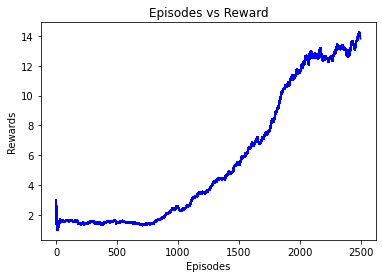

In [7]:
rewards, episodes = [], []
best_eval_reward = 0
for e in range(EPISODES):
    done = False
    score = 0

    history = np.zeros([5, 84, 84], dtype=np.uint8)
    step = 0
    d = False
    state = env.reset()
    next_state = state
    life = number_lives

    get_init_state(history, state)

    while not done:
        step += 1
        frame += 1

        # Perform a fire action if ball is no longer on screen to continue onto next life
        if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
            action = 0
        else:
            action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
        state = next_state
        next_state, reward, done, info = env.step(action + 1)
        
        frame_next_state = get_frame(next_state)
        history[4, :, :] = frame_next_state
        terminal_state = check_live(life, info['ale.lives'])

        life = info['ale.lives']
        r = np.clip(reward, -1, 1) 
        r = reward

        # Store the transition in memory 
        agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
        # Start training after random sample generation
        if(frame >= train_frame):
            agent.train_policy_net(frame)
            # Update the target network only for Double DQN only
            if double_dqn and (frame % update_target_network_frequency)== 0:
                agent.update_target_net()
        score += reward
        history[:4, :, :] = history[1:, :, :]
            
        if done:
            evaluation_reward.append(score)
            rewards.append(np.mean(evaluation_reward))
            episodes.append(e)
            pylab.plot(episodes, rewards, 'b')
            pylab.xlabel('Episodes')
            pylab.ylabel('Rewards') 
            pylab.title('Episodes vs Reward')
            pylab.savefig("./save_graph/breakout_dqn.png") # save graph for training visualization
            
            # every episode, plot the play time
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon, "   steps:", step,
                  "   lr:", agent.optimizer.param_groups[0]['lr'], "    evaluation reward:", np.mean(evaluation_reward))

            # if the mean of scores of last 100 episode is bigger than 5 save model
            ### Change this save condition to whatever you prefer ###
            if np.mean(evaluation_reward) > 5 and np.mean(evaluation_reward) > best_eval_reward:
                torch.save(agent.policy_net, "./save_model/breakout_dqn.pth")
                best_eval_reward = np.mean(evaluation_reward)


# Visualize Agent Performance

BE AWARE THIS CODE BELOW MAY CRASH THE KERNEL IF YOU RUN THE SAME CELL TWICE.

Please save your model before running this portion of the code.

In [8]:
torch.save(agent.policy_net, "./save_model/breakout_dqn_latest.pth")

In [9]:
from gym.wrappers import Monitor
import glob
import io
import base64

from IPython.display import HTML
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display

# Displaying the game live
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % ("Agent Playing",step, info))
    plt.axis('off')

    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())
    
# Recording the game and replaying the game afterwards
def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")
    

def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env

In [10]:
display = Display(visible=0, size=(300, 200))
display.start()

# Load agent
# agent.load_policy_net("./save_model/breakout_dqn.pth")
agent.epsilon = 0.0 # Set agent to only exploit the best action

env = gym.make('BreakoutDeterministic-v4')
env = wrap_env(env)

done = False
score = 0
step = 0
state = env.reset()
next_state = state
life = number_lives
history = np.zeros([5, 84, 84], dtype=np.uint8)
get_init_state(history, state)

while not done:
    
    # Render breakout
    env.render()
#     show_state(env,step) # uncommenting this provides another way to visualize the game

    step += 1
    frame += 1

    # Perform a fire action if ball is no longer on screen
    if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
        action = 0
    else:
        action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
    state = next_state
    
    next_state, reward, done, info = env.step(action + 1)
        
    frame_next_state = get_frame(next_state)
    history[4, :, :] = frame_next_state
    terminal_state = check_live(life, info['ale.lives'])
        
    life = info['ale.lives']
    r = np.clip(reward, -1, 1) 
    r = reward

    # Store the transition in memory 
    agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
    # Start training after random sample generation
    score += reward
    
    history[:4, :, :] = history[1:, :, :]
env.close()
show_video()
display.stop()

EasyProcessError: start error <EasyProcess cmd_param=['Xvfb', '-help'] cmd=['Xvfb', '-help'] oserror=[Errno 12] Cannot allocate memory return_code=None stdout="None" stderr="None" timeout_happened=False>